In [1]:
import sys 
sys.executable

'C:\\Users\\Changho_Notebook\\anaconda3\\python.exe'

In [2]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv('./data/test_data0414_test.csv', encoding = 'euc-kr')

In [6]:
data

,Text,Feeling_Saltlux
0,"‘인도’가 적에게 포위를 당했는데, 적들이 은화 6백 개를 내놓을 때까지 물러나지 ...",1
1,"그래서 주민들이 북을 치며 선포하길,",2
2,*누구든 그 돈을 마련하는 사람을 시장으로 삼겠다*,3
3,라고 했답니다,4
4,"때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다, 그 적들이 들...",5
...,...,...
13053,그런데 그 호랑이는 바로 옛날에 나무꾼이 도와주었던 호랑이였습니다,4
13054,*저는 나이가 들어 어차피 죽을 목숨이니 저를 임금에게 제물로 바치십시오*,1
13055,그러곤 호랑이는 숨을 거두었습니다,4
13056,나무꾼은 숨을 거둔 호랑이를 차마 제물로 바치지 못하고 양지바른 땅에 묻어주었습니다,5


In [7]:
print(len(data))

13058


In [8]:
data = data.iloc[:,:2]

In [9]:
data

,Text,Feeling_Saltlux
0,"‘인도’가 적에게 포위를 당했는데, 적들이 은화 6백 개를 내놓을 때까지 물러나지 ...",1
1,"그래서 주민들이 북을 치며 선포하길,",2
2,*누구든 그 돈을 마련하는 사람을 시장으로 삼겠다*,3
3,라고 했답니다,4
4,"때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다, 그 적들이 들...",5
...,...,...
13053,그런데 그 호랑이는 바로 옛날에 나무꾼이 도와주었던 호랑이였습니다,4
13054,*저는 나이가 들어 어차피 죽을 목숨이니 저를 임금에게 제물로 바치십시오*,1
13055,그러곤 호랑이는 숨을 거두었습니다,4
13056,나무꾼은 숨을 거둔 호랑이를 차마 제물로 바치지 못하고 양지바른 땅에 묻어주었습니다,5


In [11]:
data['Text'].nunique(), data['Feeling_Saltlux'].nunique()

(11740, 7)

In [12]:
display(data[data.duplicated()])

,Text,Feeling_Saltlux
54,라고 말했어요,4
143,"*젬지 산아, 젬지 산아, 열리거라*",4
150,"*젬지 산아, 젬지 산아, 닫히거라*",1
172,"*젬지 산아, 젬지 산아, 열리거라*",4
215,라고 그가 말했어요,5
...,...,...
12634,라며 앨리스가 말했어요,4
12645,라며 앨리스가 말했어요,4
12975,*뭐라고*,1
13003,라고 물었습니다,1


In [14]:
data['Feeling_Saltlux'].value_counts()

4    4969
5    4733
1    1518
3     756
2     695
7     271
6     116
Name: Feeling_Saltlux, dtype: int64

In [195]:
data = data[data["Feeling"] != 22.0]

In [16]:
data['Feeling_Saltlux'].value_counts()

4    4969
5    4733
1    1518
3     756
2     695
7     271
6     116
Name: Feeling_Saltlux, dtype: int64

<AxesSubplot:>

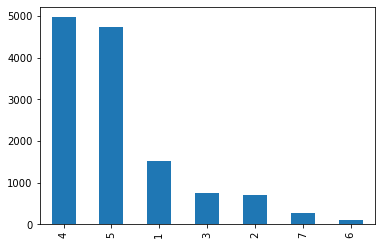

In [18]:
data['Feeling_Saltlux'].value_counts().plot(kind='bar')

In [198]:
#  결측치 제거

In [19]:
data.isnull().sum()

Text               0
Feeling_Saltlux    0
dtype: int64

In [20]:
data = data.dropna(how = 'any')
print(data.isnull().values.any())

False


In [22]:
data = data.astype({"Feeling_Saltlux" : 'int64'})
data['Feeling_Saltlux']

0        1
1        2
2        3
3        4
4        5
        ..
13053    4
13054    1
13055    4
13056    5
13057    4
Name: Feeling_Saltlux, Length: 13058, dtype: int64

In [23]:
# 한글만 남기기 

data['Text'] = data['Text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data

,Text,Feeling_Saltlux
0,인도가 적에게 포위를 당했는데 적들이 은화 백 개를 내놓을 때까지 물러나지 않겠다고...,1
1,그래서 주민들이 북을 치며 선포하길,2
2,누구든 그 돈을 마련하는 사람을 시장으로 삼겠다,3
3,라고 했답니다,4
4,때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다 그 적들이 들이...,5
...,...,...
13053,그런데 그 호랑이는 바로 옛날에 나무꾼이 도와주었던 호랑이였습니다,4
13054,저는 나이가 들어 어차피 죽을 목숨이니 저를 임금에게 제물로 바치십시오,1
13055,그러곤 호랑이는 숨을 거두었습니다,4
13056,나무꾼은 숨을 거둔 호랑이를 차마 제물로 바치지 못하고 양지바른 땅에 묻어주었습니다,5


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], 
                                                    data['Feeling_Saltlux'], 
                                                    test_size=0.1, 
                                                    random_state=1004)

In [27]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

7852                                      잠시 서 있던 농부가 마침내 
8312                                           그럼 아내가 맞잖아요
8560                                         하느님 제 수명은 얼마죠
5538     수줍어하며 그녀가 씻어내자 얼굴과 손이 다시금 상아 빛깔보다 더 새하얗게 변하며 본...
12245                                확실히 계속 편치 않아 보일 거 같았죠
                               ...                        
8206                   숲에 사는 새들이 날아와 어제처럼 죄다 주워 먹고 간 뒤였거든요
8391          라며 이름 없던 작은 새가 독수리의 가슴부분 깃털 사이에서 삐져나오며 소리쳤어요
9455             하지만 가까워짐에 따라 재봉사의 눈이 휘둥그레지고 입이 딱 벌어지지 뭐예요
4127                불쌍한 딸은 엄마를 피해 달아나 거기서 그리 멀지 않은 숲에 숨었어요
10763                               뭐 이리 반대를 잘하는 애벌레가 다 있담
Name: Text, Length: 11752, dtype: object
10302    그 말을 하며 자기도 만족스러웠는지 새끼 독수리는 미소 지은 얼굴을 숙여 감추었다
1456                  하녀가 궁전으로 가 그 말을 전하자 공주가 직접 찾아왔어요
8721                      저 딴 식으로 건물 지어 멀쩡할 집이 어디 있어  
12693                                           으앙 배고파
8646                                            모르겠는데요
                             ...   

In [28]:
# 토큰화

In [29]:
# 추후 늘리기
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [30]:
okt = Okt()
X_trains = []
for sentence in X_train:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_trains.append(temp_X)

In [31]:
# word_list = []
# for word in temp_X :
#    if not word in stopwords:
#        word_list.append(word)

In [32]:
okt = Okt()
X_tests = []
for sentence in X_test:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_tests.append(temp_X)

In [33]:
X_train = X_trains
X_test = X_tests

In [34]:
print(X_train[:3])
print(X_test[:3])

[['잠시', '서다', '있다', '농부가', '마침내'], ['그렇다', '아내', '맞다'], ['하느님', '제', '수명', '얼마', '죠']]
[['그', '말', '을', '자기', '만족스럽다', '새끼', '독수리', '미소', '지은', '얼굴', '을', '숙이다', '감추다'], ['하녀', '궁전', '가다', '그', '말', '을', '전하', '공주', '직접', '찾아오다'], ['저', '따다', '식', '건물', '지다', '멀쩡하다', '집', '어디', '있다']]


In [35]:
# 정수 인코딩
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

In [36]:
print(tokenizer.word_index)

{'을': 1, '그': 2, '말': 3, '있다': 4, '그녀': 5, '라며': 6, '그렇다': 7, '로': 8, '보다': 9, '않다': 10, '에게': 11, '없다': 12, '이다': 13, '에서': 14, '자신': 15, '내': 16, '게': 17, '거': 18, '앨리스': 19, '가다': 20, '되다': 21, '수': 22, '하지만': 23, '것': 24, '왕': 25, '들다': 26, '고': 27, '다': 28, '요': 29, '더': 30, '다음': 31, '네': 32, '그래서': 33, '저': 34, '두': 35, '생각': 36, '다시': 37, '때': 38, '말다': 39, '오다': 40, '안': 41, '하나': 42, '못': 43, '걸': 44, '아니다': 45, '제': 46, '되어다': 47, '님': 48, '사람': 49, '예요': 50, '만': 51, '뭐': 52, '집': 53, '라고': 54, '먹다': 55, '공주': 56, '엔': 57, '아이': 58, '소리': 59, '왕자': 60, '크다': 61, '아': 62, '까지': 63, '당신': 64, '같다': 65, '해주다': 66, '날': 67, '시작': 68, '나': 69, '모두': 70, '하고': 71, '아내': 72, '눈': 73, '알다': 74, '어떻다': 75, '자다': 76, '아빠': 77, '좋다': 78, '앉다': 79, '번': 80, '왕비': 81, '지': 82, '버리다': 83, '그리고': 84, '속': 85, '손': 86, '정말': 87, '이제': 88, '세': 89, '주다': 90, '대답': 91, '일': 92, '야': 93, '나오다': 94, '작다': 95, '난': 96, '받다': 97, '우리': 98, '문': 99, '모든': 100, '위': 101, '죠': 102, '들어가다': 103, '엄마

In [37]:
threshold = 4
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0   # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0  # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7735
등장 빈도가 3번 이하인 희귀 단어의 수: 4404
단어 집합에서 희귀 단어의 비율: 56.936005171299286
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.870823221952586


In [38]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3332


In [39]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [40]:
print(X_train[:3])

[[336, 167, 4, 551, 279], [7, 72, 337], [311, 46, 1066, 1123, 102]]


In [41]:
# 빈 샘플 제거 
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_train2 = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [42]:
print(len(X_train))
y_train = list(y_train)
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

11752
11707
11707


C:\Users\Changho_Notebook\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [43]:
y_test = list(y_test)
X_test = np.delete(X_test, drop_train2, axis=0)
y_test = np.delete(y_test, drop_train2, axis=0)
print(len(X_test))
print(len(y_test))

1300
1300


리뷰의 최대 길이 : 106
리뷰의 평균 길이 : 9.475954557102588


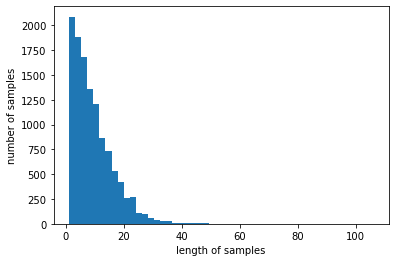

In [44]:
# 패딩
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 98.65892201247118


In [47]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [48]:
# y(결과값) 라벨링
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
# 모델 시작 (LSTM)

In [50]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(256)))
# model.add(Dense(256, activation = 'relu'))
model.add(Dense(8,activation = 'softmax'))

In [63]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)
# history = model.fit(X_train, y_train, epochs=15, callbacks=[mc], batch_size=60, validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 9s 22ms/step - loss: 1.5417 - acc: 0.3912 - val_loss: 1.2445 - val_acc: 0.5500

Epoch 00001: val_acc improved from -inf to 0.54996, saving model to best_model.h5
Epoch 2/15
157/157 [==============================] - 2s 13ms/step - loss: 1.1178 - acc: 0.6061 - val_loss: 1.0859 - val_acc: 0.6029

Epoch 00002: val_acc improved from 0.54996 to 0.60290, saving model to best_model.h5
Epoch 3/15
157/157 [==============================] - 2s 13ms/step - loss: 0.8942 - acc: 0.6912 - val_loss: 1.0607 - val_acc: 0.6093

Epoch 00003: val_acc improved from 0.60290 to 0.60931, saving model to best_model.h5
Epoch 4/15
157/157 [==============================] - 2s 13ms/step - loss: 0.7320 - acc: 0.7344 - val_loss: 1.0545 - val_acc: 0.6349

Epoch 00004: val_acc improved from 0.60931 to 0.63493, saving model to best_model.h5
Epoch 5/15
157/157 [==============================] - 2s 14ms/step - loss: 0.5866 - acc: 0.7932 - val_loss: 1.1181 - val_acc: 0

- LSTM 256
    - adam -> 0.4939
    - rmsprop -> 0.4311
- LSTM 512 
    - adam -> 0.4500 큰차이 없음 
- GRU 256 
    - adam -> 0.49215
    - rmsprop -> 0.4180
- GRU 512 
    - adam -> 0.49825
- BiLSTM
    - adam -> 0.49651

In [65]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

41/41 [==============================] - 1s 6ms/step - loss: 1.5015 - acc: 0.6338

 테스트 정확도: 0.6338


In [53]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format(score))

In [54]:
sentiment_predict('안녕 나는 너를 만나러 왔어')

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
print(y_train)
print(type(y_train))
print(y_train[0])
print(type(y_train[0]))

In [ ]:
np.unique(y_train)

In [ ]:
copy_dt = y_train.copy()

In [ ]:
y_train = copy_dt
y_train